# Performance of statistical model

[https://stats.oarc.ucla.edu/other/dae/](https://stats.oarc.ucla.edu/other/dae/)

## Linear Model

$$
y_{i} = \beta_{0} + \beta_{1}x_{1,i}+\beta_{2}x_{2,i}+\cdots+\beta_{p}x_{p,i}+\varepsilon_{i},\quad\forall i = 1,\dots,n
$$

## Logistic Model

$$
log\left(\dfrac{p_{\beta}}{1-p_{\beta}}\right) = \beta_{0} + \beta_{1}x_{1,i}+\beta_{2}x_{2,i}+\cdots+\beta_{p}x_{p,i}+\varepsilon_{i},\quad\forall i = 1,\dots,n
$$

with $p_{\beta} = \mathbb{P}_{\beta}\left(Y=1\lvert X= x\right)$

## Multinomial Logistic Model

$$
\log\left(\dfrac{\mathbb{P}_{\beta}\left(Y= j\lvert X= x\right)}{\mathbb{P}_{\beta}\left(Y=\text{ref}\lvert X= x\right)}\right) = 
$$

## Ordinal Logistic Model

$$
\log\left(\dfrac{\mathbb{P}\left(Y<j\lvert X= x\right)}{\mathbb{P}\left(Y\geq j\lvert X= x\right)}\right)
$$

## Poisson Model

$$
\log \left(\lambda(x)\right) = X\beta
$$

## Application

In [1]:
# Load packages
import pandas as pd
import numpy as np
from skimpy import skim
import scipy.stats as st
import statsmodels.formula.api as smf
from statsmodels.miscmodels.ordinal_model import OrderedModel # For ordinal logistic regression
from scientistmetrics.performance import *

### Linear regression

In [2]:
# Load dataset
crime = pd.read_stata("https://stats.idre.ucla.edu/stat/data/crime.dta")
# Head
crime.head()

,sid,state,crime,murder,pctmetro,pctwhite,pcths,poverty,single
0,1.0,ak,761,9.0,41.799999,75.199997,86.599998,9.100000,14.3
1,2.0,al,780,11.6,67.400002,73.500000,66.900002,17.400000,11.5
2,3.0,ar,593,10.2,44.700001,82.900002,66.300003,20.000000,10.7
3,4.0,az,715,8.6,84.699997,88.599998,78.699997,15.400000,12.1
4,5.0,ca,1078,13.1,96.699997,79.300003,76.199997,18.200001,12.5


In [3]:
# Informations
crime.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51 entries, 0 to 50
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   sid       51 non-null     float32
 1   state     51 non-null     object 
 2   crime     51 non-null     int16  
 3   murder    51 non-null     float32
 4   pctmetro  51 non-null     float32
 5   pctwhite  51 non-null     float32
 6   pcths     51 non-null     float32
 7   poverty   51 non-null     float32
 8   single    51 non-null     float32
dtypes: float32(7), int16(1), object(1)
memory usage: 2.0+ KB


In [4]:
# Summary of crime
skim(crime,header_style="italic magenta")

╭──────────────────────────────────────────────── skimpy summary ─────────────────────────────────────────────────╮
│          Data Summary                Data Types                                                                 │
│ ┏━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┓ ┏━━━━━━━━━━━━━┳━━━━━━━┓                                                          │
│ ┃ dataframe         ┃ Values ┃ ┃ Column Type ┃ Count ┃                                                          │
│ ┡━━━━━━━━━━━━━━━━━━━╇━━━━━━━━┩ ┡━━━━━━━━━━━━━╇━━━━━━━┩                                                          │
│ │ Number of rows    │ 51     │ │ float64     │ 7     │                                                          │
│ │ Number of columns │ 9      │ │ string      │ 1     │                                                          │
│ └───────────────────┴────────┘ │ int32       │ 1     │                                                          │
│                                └─────────────┴───────┘                                                          │
│                                                     number                                                      │
│ ┏━━━━━━━━━━━━━━━━━━━┳━━━━━━┳━━━━━━━━━┳━━━━━━━━━┳━━━━━━━━┳━━━━━━━┳━━━━━━━┳━━━━━━━┳━━━━━━━┳━━━━━━━━━┳━━━━━━━━━━┓  │
│ ┃ column_name       ┃ NA   ┃ NA %    ┃ mean    ┃ sd     ┃ p0    ┃ p25   ┃ p50   ┃ p75   ┃ p100    ┃ hist     ┃  │
│ ┡━━━━━━━━━━━━━━━━━━━╇━━━━━━╇━━━━━━━━━╇━━━━━━━━━╇━━━━━━━━╇━━━━━━━╇━━━━━━━╇━━━━━━━╇━━━━━━━╇━━━━━━━━━╇━━━━━━━━━━┩  │
│ │ sid               │    0 │       0 │      26 │     15 │     1 │    14 │    26 │    38 │      51 │  ▇▇▇▇▇▇  │  │
│ │ crime             │    0 │       0 │     610 │    440 │    82 │   330 │   520 │   770 │    2900 │   ▇▆▁    │  │
│ │ murder            │    0 │       0 │     8.7 │     11 │   1.6 │   3.9 │   6.8 │    10 │      78 │    ▇     │  │
│ │ pctmetro          │    0 │       0 │      67 │     22 │    24 │    50 │    70 │    84 │     100 │  ▅▃▃▆▇▅  │  │
│ │ pctwhite          │    0 │       0 │      84 │     13 │    32 │    79 │    88 │    93 │      98 │  ▁  ▂▅▇  │  │
│ │ pcths             │    0 │       0 │      76 │    5.6 │    64 │    74 │    77 │    80 │      87 │  ▃▂▆▇▇▃  │  │
│ │ poverty           │    0 │       0 │      14 │    4.6 │     8 │    11 │    13 │    17 │      26 │  ▇▇▃▅▁▁  │  │
│ │ single            │    0 │       0 │      11 │    2.1 │   8.4 │    10 │    11 │    12 │      22 │   ▆▇▂    │  │
│ └───────────────────┴──────┴─────────┴─────────┴────────┴───────┴───────┴───────┴───────┴─────────┴──────────┘  │
│                                                     string                                                      │
│ ┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━┓  │
│ ┃ column_name               ┃ NA      ┃ NA %       ┃ words per row                ┃ total words              ┃  │
│ ┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━┩  │
│ │ state                     │       0 │          0 │                            1 │                       51 │  │
│ └───────────────────────────┴─────────┴────────────┴──────────────────────────────┴──────────────────────────┘  │
╰────────────────────────────────────────────────────── End ──────────────────────────────────────────────────────╯

In [5]:
#  linear model
ols = smf.ols("crime ~ poverty + single", data = crime).fit()
ols.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                 Results: Ordinary least squares
=================================================================
Model:              OLS              Adj. R-squared:     0.695   
Dependent Variable: crime            AIC:                708.1879
Date:               2023-09-16 13:29 BIC:                713.9834
No. Observations:   51               Log-Likelihood:     -351.09 
Df Model:           2                F-statistic:        57.96   
Df Residuals:       48               Prob (F-statistic): 1.58e-13
R-squared:          0.707            Scale:              59346.  
-----------------------------------------------------------------
            Coef.    Std.Err.    t    P>|t|    [0.025     0.975] 
-----------------------------------------------------------------
Intercept -1368.1887 187.2052 -7.3085 0.0000 -1744.5899 -991.7874
poverty       6.7874   8.9885  0.7551 0.4539   -11.2853   24.8600
single      166.3727  19.4229  8.5658 0.0000   127.3203  205.4250
-----------------------------------------------------------------
Omnibus:              7.065        Durbin-Watson:          2.040 
Prob(Omnibus):        0.029        Jarque-Bera (JB):       10.553
Skew:                 -0.276       Prob(JB):               0.005 
Kurtosis:             5.159        Condition No.:          103   
=================================================================
Notes:
[1] Standard Errors assume that the covariance matrix of the
errors is correctly specified.
"""

### Logistic Regression

In [6]:
binarie = pd.read_csv("https://stats.idre.ucla.edu/stat/data/binary.csv")
binarie.head()

,admit,gre,gpa,rank
0,0,380,3.61,3
1,1,660,3.67,3
2,1,800,4.00,1
3,1,640,3.19,4
4,0,520,2.93,4


In [7]:
binarie.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   admit   400 non-null    int64  
 1   gre     400 non-null    int64  
 2   gpa     400 non-null    float64
 3   rank    400 non-null    int64  
dtypes: float64(1), int64(3)
memory usage: 12.6 KB


In [8]:
binarie["rank"] = binarie["rank"].astype("category")

In [9]:
skim(binarie,header_style="italic magenta")

╭──────────────────────────────────────────────── skimpy summary ─────────────────────────────────────────────────╮
│          Data Summary                Data Types               Categories                                        │
│ ┏━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┓ ┏━━━━━━━━━━━━━┳━━━━━━━┓ ┏━━━━━━━━━━━━━━━━━━━━━━━┓                                │
│ ┃ dataframe         ┃ Values ┃ ┃ Column Type ┃ Count ┃ ┃ Categorical Variables ┃                                │
│ ┡━━━━━━━━━━━━━━━━━━━╇━━━━━━━━┩ ┡━━━━━━━━━━━━━╇━━━━━━━┩ ┡━━━━━━━━━━━━━━━━━━━━━━━┩                                │
│ │ Number of rows    │ 400    │ │ int32       │ 2     │ │ rank                  │                                │
│ │ Number of columns │ 4      │ │ float64     │ 1     │ └───────────────────────┘                                │
│ └───────────────────┴────────┘ │ category    │ 1     │                                                          │
│                                └─────────────┴───────┘                                                          │
│                                                     number                                                      │
│ ┏━━━━━━━━━━━━━━━━━━━┳━━━━━━┳━━━━━━━━━┳━━━━━━━━━┳━━━━━━━━━┳━━━━━━━┳━━━━━━━┳━━━━━━━┳━━━━━━━┳━━━━━━━━┳━━━━━━━━━━┓  │
│ ┃ column_name       ┃ NA   ┃ NA %    ┃ mean    ┃ sd      ┃ p0    ┃ p25   ┃ p50   ┃ p75   ┃ p100   ┃ hist     ┃  │
│ ┡━━━━━━━━━━━━━━━━━━━╇━━━━━━╇━━━━━━━━━╇━━━━━━━━━╇━━━━━━━━━╇━━━━━━━╇━━━━━━━╇━━━━━━━╇━━━━━━━╇━━━━━━━━╇━━━━━━━━━━┩  │
│ │ admit             │    0 │       0 │    0.32 │    0.47 │     0 │     0 │     0 │     1 │      1 │  ▇    ▃  │  │
│ │ gre               │    0 │       0 │     590 │     120 │   220 │   520 │   580 │   660 │    800 │   ▂▅▇▇▃  │  │
│ │ gpa               │    0 │       0 │     3.4 │    0.38 │   2.3 │   3.1 │   3.4 │   3.7 │      4 │   ▂▅▇▇▇  │  │
│ └───────────────────┴──────┴─────────┴─────────┴─────────┴───────┴───────┴───────┴───────┴────────┴──────────┘  │
│                                                    category                                                     │
│ ┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━┓  │
│ ┃ column_name                      ┃ NA        ┃ NA %           ┃ ordered               ┃ unique             ┃  │
│ ┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━┩  │
│ │ rank                             │         0 │              0 │ False                 │                  4 │  │
│ └──────────────────────────────────┴───────────┴────────────────┴───────────────────────┴────────────────────┘  │
╰────────────────────────────────────────────────────── End ──────────────────────────────────────────────────────╯

In [10]:
# Logistic model
glm = smf.logit("admit~gre+gpa+ rank", data = binarie).fit(disp=False)
glm.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                         Results: Logit
=================================================================
Model:              Logit            Method:           MLE       
Dependent Variable: admit            Pseudo R-squared: 0.083     
Date:               2023-09-16 13:29 AIC:              470.5175  
No. Observations:   400              BIC:              494.4663  
Df Model:           5                Log-Likelihood:   -229.26   
Df Residuals:       394              LL-Null:          -249.99   
Converged:          1.0000           LLR p-value:      7.5782e-08
No. Iterations:     6.0000           Scale:            1.0000    
------------------------------------------------------------------
               Coef.   Std.Err.     z     P>|z|    [0.025   0.975]
------------------------------------------------------------------
Intercept     -3.9900    1.1400  -3.5001  0.0005  -6.2242  -1.7557
rank[T.2]     -0.6754    0.3165  -2.1342  0.0328  -1.2958  -0.0551
rank[T.3]     -1.3402    0.3453  -3.8812  0.0001  -2.0170  -0.6634
rank[T.4]     -1.5515    0.4178  -3.7131  0.0002  -2.3704  -0.7325
gre            0.0023    0.0011   2.0699  0.0385   0.0001   0.0044
gpa            0.8040    0.3318   2.4231  0.0154   0.1537   1.4544
=================================================================

"""

### Multinomial Logistic Regression

In [11]:
# Multinomial Logistic Regression
hsbdemo = pd.read_stata("https://stats.idre.ucla.edu/stat/data/hsbdemo.dta")
hsbdemo.head()

,id,female,ses,schtyp,prog,read,write,math,science,socst,honors,awards,cid
0,45.0,female,low,public,vocation,34.0,35.0,41.0,29.0,26.0,not enrolled,0.0,1
1,108.0,male,middle,public,general,34.0,33.0,41.0,36.0,36.0,not enrolled,0.0,1
2,15.0,male,high,public,vocation,39.0,39.0,44.0,26.0,42.0,not enrolled,0.0,1
3,67.0,male,low,public,vocation,37.0,37.0,42.0,33.0,32.0,not enrolled,0.0,1
4,153.0,male,middle,public,vocation,39.0,31.0,40.0,39.0,51.0,not enrolled,0.0,1


In [12]:
hsbdemo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype   
---  ------   --------------  -----   
 0   id       200 non-null    float32 
 1   female   200 non-null    category
 2   ses      200 non-null    category
 3   schtyp   200 non-null    category
 4   prog     200 non-null    category
 5   read     200 non-null    float32 
 6   write    200 non-null    float32 
 7   math     200 non-null    float32 
 8   science  200 non-null    float32 
 9   socst    200 non-null    float32 
 10  honors   200 non-null    category
 11  awards   200 non-null    float32 
 12  cid      200 non-null    int16   
dtypes: category(5), float32(7), int16(1)
memory usage: 7.6 KB


In [13]:
skim(hsbdemo,header_style="italic magenta")

╭──────────────────────────────────────────────── skimpy summary ─────────────────────────────────────────────────╮
│          Data Summary                Data Types               Categories                                        │
│ ┏━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┓ ┏━━━━━━━━━━━━━┳━━━━━━━┓ ┏━━━━━━━━━━━━━━━━━━━━━━━┓                                │
│ ┃ dataframe         ┃ Values ┃ ┃ Column Type ┃ Count ┃ ┃ Categorical Variables ┃                                │
│ ┡━━━━━━━━━━━━━━━━━━━╇━━━━━━━━┩ ┡━━━━━━━━━━━━━╇━━━━━━━┩ ┡━━━━━━━━━━━━━━━━━━━━━━━┩                                │
│ │ Number of rows    │ 200    │ │ float64     │ 7     │ │ female                │                                │
│ │ Number of columns │ 13     │ │ category    │ 5     │ │ ses                   │                                │
│ └───────────────────┴────────┘ │ int32       │ 1     │ │ schtyp                │                                │
│                                └─────────────┴───────┘ │ prog                  │                                │
│                                                        │ honors                │                                │
│                                                        └───────────────────────┘                                │
│                                                     number                                                      │
│ ┏━━━━━━━━━━━━━━━━━━━━┳━━━━━━┳━━━━━━━━━┳━━━━━━━━━┳━━━━━━━━┳━━━━━━┳━━━━━━━┳━━━━━━━┳━━━━━━━┳━━━━━━━━━┳━━━━━━━━━━┓  │
│ ┃ column_name        ┃ NA   ┃ NA %    ┃ mean    ┃ sd     ┃ p0   ┃ p25   ┃ p50   ┃ p75   ┃ p100    ┃ hist     ┃  │
│ ┡━━━━━━━━━━━━━━━━━━━━╇━━━━━━╇━━━━━━━━━╇━━━━━━━━━╇━━━━━━━━╇━━━━━━╇━━━━━━━╇━━━━━━━╇━━━━━━━╇━━━━━━━━━╇━━━━━━━━━━┩  │
│ │ id                 │    0 │       0 │     100 │     58 │    1 │    51 │   100 │   150 │     200 │  ▇▇▇▇▇▇  │  │
│ │ read               │    0 │       0 │      52 │     10 │   28 │    44 │    50 │    60 │      76 │  ▁▃▇▆▅▃  │  │
│ │ write              │    0 │       0 │      53 │    9.5 │   31 │    46 │    54 │    60 │      67 │  ▂▃▅▇▇▇  │  │
│ │ math               │    0 │       0 │      53 │    9.4 │   33 │    45 │    52 │    59 │      75 │  ▂▇▇▇▅▂  │  │
│ │ science            │    0 │       0 │      52 │    9.9 │   26 │    44 │    53 │    58 │      74 │  ▁▃▅▇▆▂  │  │
│ │ socst              │    0 │       0 │      52 │     11 │   26 │    46 │    52 │    61 │      71 │  ▂▁▅▃▇▃  │  │
│ │ awards             │    0 │       0 │     1.7 │    1.8 │    0 │     0 │     1 │     2 │       7 │  ▇▃▂ ▁▁  │  │
│ │ cid                │    0 │       0 │      10 │    5.8 │    1 │     5 │    10 │    15 │      20 │  ▇▆▆▆▆▇  │  │
│ └────────────────────┴──────┴─────────┴─────────┴────────┴──────┴───────┴───────┴───────┴─────────┴──────────┘  │
│                                                    category                                                     │
│ ┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━┓  │
│ ┃ column_name                      ┃ NA        ┃ NA %           ┃ ordered               ┃ unique             ┃  │
│ ┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━┩  │
│ │ female                           │         0 │              0 │ True                  │                  2 │  │
│ │ ses                              │         0 │              0 │ True                  │                  3 │  │
│ │ schtyp                           │         0 │              0 │ True                  │                  2 │  │
│ │ prog                             │         0 │              0 │ True                  │                  3 │  │
│ │ honors                           │         0 │              0 │ True                  │                  2 │  │
│ └──────────────────────────────────┴───────────┴────────────────┴───────────────────────┴────────────────────┘  │
╰────────────────────────────────────────────────────── 

In [14]:
np.unique(hsbdemo.prog,return_counts=True)

(array(['academic', 'general', 'vocation'], dtype=object),
 array([105,  45,  50], dtype=int64))

In [15]:
hsbdemo.prog = hsbdemo.prog.map({'academic':0,'general':1, 'vocation': 2}).astype("int")
np.unique(hsbdemo.prog,return_counts=True)

(array([0, 1, 2]), array([105,  45,  50], dtype=int64))

In [16]:
hsbdemo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype   
---  ------   --------------  -----   
 0   id       200 non-null    float32 
 1   female   200 non-null    category
 2   ses      200 non-null    category
 3   schtyp   200 non-null    category
 4   prog     200 non-null    int32   
 5   read     200 non-null    float32 
 6   write    200 non-null    float32 
 7   math     200 non-null    float32 
 8   science  200 non-null    float32 
 9   socst    200 non-null    float32 
 10  honors   200 non-null    category
 11  awards   200 non-null    float32 
 12  cid      200 non-null    int16   
dtypes: category(4), float32(7), int16(1), int32(1)
memory usage: 8.0 KB


In [17]:
# Mnlogit
mlogit = smf.mnlogit("prog ~ ses + write", data = hsbdemo).fit(disp=False)
mlogit.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                        Results: MNLogit
=================================================================
Model:              MNLogit          Method:           MLE       
Dependent Variable: prog             Pseudo R-squared: 0.118     
Date:               2023-09-16 13:29 AIC:              375.9635  
No. Observations:   200              BIC:              402.3500  
Df Model:           6                Log-Likelihood:   -179.98   
Df Residuals:       192              LL-Null:          -204.10   
Converged:          1.0000           LLR p-value:      1.0630e-08
No. Iterations:     6.0000           Scale:            1.0000    
-----------------------------------------------------------------
     prog = 0      Coef.  Std.Err.    t    P>|t|   [0.025  0.975]
-----------------------------------------------------------------
    Intercept      2.8522   1.1664  2.4452 0.0145  0.5660  5.1384
ses[T.middle]     -0.5333   0.4437 -1.2018 0.2294 -1.4030  0.3364
  ses[T.high]     -1.1628   0.5142 -2.2614 0.0237 -2.1707 -0.1550
        write     -0.0579   0.0214 -2.7056 0.0068 -0.0999 -0.0160
-----------------------------------------------------------------
     prog = 1      Coef.  Std.Err.    t    P>|t|   [0.025  0.975]
-----------------------------------------------------------------
    Intercept      5.2182   1.1635  4.4847 0.0000  2.9377  7.4987
ses[T.middle]      0.2914   0.4764  0.6117 0.5407 -0.6423  1.2251
  ses[T.high]     -0.9827   0.5956 -1.6500 0.0989 -2.1500  0.1846
        write     -0.1136   0.0222 -5.1127 0.0000 -0.1572 -0.0701
=================================================================

"""

### Ordinal Logistic Regression

In [18]:
olg = pd.read_stata("https://stats.idre.ucla.edu/stat/data/ologit.dta")
olg.head()

,apply,pared,public,gpa
0,very likely,0,0,3.26
1,somewhat likely,1,0,3.21
2,unlikely,1,1,3.94
3,somewhat likely,0,0,2.81
4,somewhat likely,0,0,2.53


In [19]:
olg.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype   
---  ------  --------------  -----   
 0   apply   400 non-null    category
 1   pared   400 non-null    int8    
 2   public  400 non-null    int8    
 3   gpa     400 non-null    float32 
dtypes: category(1), float32(1), int8(2)
memory usage: 3.0 KB


In [20]:
skim(olg,header_style="italic magenta")

╭──────────────────────────────────────────────── skimpy summary ─────────────────────────────────────────────────╮
│          Data Summary                Data Types               Categories                                        │
│ ┏━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┓ ┏━━━━━━━━━━━━━┳━━━━━━━┓ ┏━━━━━━━━━━━━━━━━━━━━━━━┓                                │
│ ┃ dataframe         ┃ Values ┃ ┃ Column Type ┃ Count ┃ ┃ Categorical Variables ┃                                │
│ ┡━━━━━━━━━━━━━━━━━━━╇━━━━━━━━┩ ┡━━━━━━━━━━━━━╇━━━━━━━┩ ┡━━━━━━━━━━━━━━━━━━━━━━━┩                                │
│ │ Number of rows    │ 400    │ │ int32       │ 2     │ │ apply                 │                                │
│ │ Number of columns │ 4      │ │ category    │ 1     │ └───────────────────────┘                                │
│ └───────────────────┴────────┘ │ float64     │ 1     │                                                          │
│                                └─────────────┴───────┘                                                          │
│                                                     number                                                      │
│ ┏━━━━━━━━━━━━━━━━━━━┳━━━━━━┳━━━━━━━━━┳━━━━━━━━━┳━━━━━━━━━┳━━━━━━━┳━━━━━━━┳━━━━━━━┳━━━━━━━┳━━━━━━━━┳━━━━━━━━━━┓  │
│ ┃ column_name       ┃ NA   ┃ NA %    ┃ mean    ┃ sd      ┃ p0    ┃ p25   ┃ p50   ┃ p75   ┃ p100   ┃ hist     ┃  │
│ ┡━━━━━━━━━━━━━━━━━━━╇━━━━━━╇━━━━━━━━━╇━━━━━━━━━╇━━━━━━━━━╇━━━━━━━╇━━━━━━━╇━━━━━━━╇━━━━━━━╇━━━━━━━━╇━━━━━━━━━━┩  │
│ │ pared             │    0 │       0 │    0.16 │    0.36 │     0 │     0 │     0 │     0 │      1 │  ▇    ▁  │  │
│ │ public            │    0 │       0 │    0.14 │    0.35 │     0 │     0 │     0 │     0 │      1 │  ▇    ▁  │  │
│ │ gpa               │    0 │       0 │       3 │     0.4 │   1.9 │   2.7 │     3 │   3.3 │      4 │  ▁▃▇▇▅▁  │  │
│ └───────────────────┴──────┴─────────┴─────────┴─────────┴───────┴───────┴───────┴───────┴────────┴──────────┘  │
│                                                    category                                                     │
│ ┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━┓  │
│ ┃ column_name                      ┃ NA        ┃ NA %           ┃ ordered               ┃ unique             ┃  │
│ ┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━┩  │
│ │ apply                            │         0 │              0 │ True                  │                  3 │  │
│ └──────────────────────────────────┴───────────┴────────────────┴───────────────────────┴────────────────────┘  │
╰────────────────────────────────────────────────────── End ──────────────────────────────────────────────────────╯

In [21]:
ologit =  OrderedModel.from_formula("apply~pared+public+gpa",distr='logit',data=olg).fit(method='bfgs', disp=False)
ologit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             OrderedModel Results                             
==============================================================================
Dep. Variable:                  apply   Log-Likelihood:                -358.51
Model:                   OrderedModel   AIC:                             727.0
Method:            Maximum Likelihood   BIC:                             747.0
Date:                Sat, 16 Sep 2023                                         
Time:                        13:29:43                                         
No. Observations:                 400                                         
Df Residuals:                     395                                         
Df Model:                           3                                         
===============================================================================================
                                  coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
pared                           1.0476      0.266      3.942      0.000       0.527       1.569
public                         -0.0586      0.298     -0.197      0.844      -0.642       0.525
gpa                             0.6158      0.261      2.363      0.018       0.105       1.127
unlikely/somewhat likely        2.2035      0.780      2.827      0.005       0.676       3.731
somewhat likely/very likely     0.7398      0.080      9.236      0.000       0.583       0.897
===============================================================================================
"""

### Poisson Model

In [22]:
pois = pd.read_csv("https://stats.idre.ucla.edu/stat/data/poisson_sim.csv")
pois.head()

,id,num_awards,prog,math
0,45,0,3,41
1,108,0,1,41
2,15,0,3,44
3,67,0,3,42
4,153,0,3,40


In [23]:
skim(pois,header_style="italic magenta")

╭──────────────────────────────────────────────── skimpy summary ─────────────────────────────────────────────────╮
│          Data Summary                Data Types                                                                 │
│ ┏━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┓ ┏━━━━━━━━━━━━━┳━━━━━━━┓                                                          │
│ ┃ dataframe         ┃ Values ┃ ┃ Column Type ┃ Count ┃                                                          │
│ ┡━━━━━━━━━━━━━━━━━━━╇━━━━━━━━┩ ┡━━━━━━━━━━━━━╇━━━━━━━┩                                                          │
│ │ Number of rows    │ 200    │ │ int32       │ 4     │                                                          │
│ │ Number of columns │ 4      │ └─────────────┴───────┘                                                          │
│ └───────────────────┴────────┘                                                                                  │
│                                                     number                                                      │
│ ┏━━━━━━━━━━━━━━━━━━━┳━━━━━━┳━━━━━━━━━┳━━━━━━━━━┳━━━━━━━━━┳━━━━━━┳━━━━━━━┳━━━━━━━┳━━━━━━━┳━━━━━━━━━┳━━━━━━━━━━┓  │
│ ┃ column_name       ┃ NA   ┃ NA %    ┃ mean    ┃ sd      ┃ p0   ┃ p25   ┃ p50   ┃ p75   ┃ p100    ┃ hist     ┃  │
│ ┡━━━━━━━━━━━━━━━━━━━╇━━━━━━╇━━━━━━━━━╇━━━━━━━━━╇━━━━━━━━━╇━━━━━━╇━━━━━━━╇━━━━━━━╇━━━━━━━╇━━━━━━━━━╇━━━━━━━━━━┩  │
│ │ id                │    0 │       0 │     100 │      58 │    1 │    51 │   100 │   150 │     200 │  ▇▇▇▇▇▇  │  │
│ │ num_awards        │    0 │       0 │    0.63 │     1.1 │    0 │     0 │     0 │     1 │       6 │   ▇▃▁▁   │  │
│ │ prog              │    0 │       0 │       2 │    0.69 │    1 │     2 │     2 │   2.2 │       3 │  ▃  ▇ ▃  │  │
│ │ math              │    0 │       0 │      53 │     9.4 │   33 │    45 │    52 │    59 │      75 │  ▂▇▇▇▅▂  │  │
│ └───────────────────┴──────┴─────────┴─────────┴─────────┴──────┴───────┴───────┴───────┴─────────┴──────────┘  │
╰────────────────────────────────────────────────────── End ──────────────────────────────────────────────────────╯

In [24]:
# recode
pois["prog"] = pois["prog"].astype("category")
pois["prog"] = pois["prog"].map({1 : "General",2 : "Academic",3:"Vocational"})
pois.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   id          200 non-null    int64   
 1   num_awards  200 non-null    int64   
 2   prog        200 non-null    category
 3   math        200 non-null    int64   
dtypes: category(1), int64(3)
memory usage: 5.1 KB


In [25]:
skim(pois,header_style="italic magenta")

╭──────────────────────────────────────────────── skimpy summary ─────────────────────────────────────────────────╮
│          Data Summary                Data Types               Categories                                        │
│ ┏━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┓ ┏━━━━━━━━━━━━━┳━━━━━━━┓ ┏━━━━━━━━━━━━━━━━━━━━━━━┓                                │
│ ┃ dataframe         ┃ Values ┃ ┃ Column Type ┃ Count ┃ ┃ Categorical Variables ┃                                │
│ ┡━━━━━━━━━━━━━━━━━━━╇━━━━━━━━┩ ┡━━━━━━━━━━━━━╇━━━━━━━┩ ┡━━━━━━━━━━━━━━━━━━━━━━━┩                                │
│ │ Number of rows    │ 200    │ │ int32       │ 3     │ │ prog                  │                                │
│ │ Number of columns │ 4      │ │ category    │ 1     │ └───────────────────────┘                                │
│ └───────────────────┴────────┘ └─────────────┴───────┘                                                          │
│                                                     number                                                      │
│ ┏━━━━━━━━━━━━━━━━━━━━┳━━━━━━┳━━━━━━━━━┳━━━━━━━━━┳━━━━━━━━┳━━━━━━┳━━━━━━━┳━━━━━━━┳━━━━━━━┳━━━━━━━━━┳━━━━━━━━━━┓  │
│ ┃ column_name        ┃ NA   ┃ NA %    ┃ mean    ┃ sd     ┃ p0   ┃ p25   ┃ p50   ┃ p75   ┃ p100    ┃ hist     ┃  │
│ ┡━━━━━━━━━━━━━━━━━━━━╇━━━━━━╇━━━━━━━━━╇━━━━━━━━━╇━━━━━━━━╇━━━━━━╇━━━━━━━╇━━━━━━━╇━━━━━━━╇━━━━━━━━━╇━━━━━━━━━━┩  │
│ │ id                 │    0 │       0 │     100 │     58 │    1 │    51 │   100 │   150 │     200 │  ▇▇▇▇▇▇  │  │
│ │ num_awards         │    0 │       0 │    0.63 │    1.1 │    0 │     0 │     0 │     1 │       6 │   ▇▃▁▁   │  │
│ │ math               │    0 │       0 │      53 │    9.4 │   33 │    45 │    52 │    59 │      75 │  ▂▇▇▇▅▂  │  │
│ └────────────────────┴──────┴─────────┴─────────┴────────┴──────┴───────┴───────┴───────┴─────────┴──────────┘  │
│                                                    category                                                     │
│ ┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━┓  │
│ ┃ column_name                      ┃ NA        ┃ NA %           ┃ ordered               ┃ unique             ┃  │
│ ┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━┩  │
│ │ prog                             │         0 │              0 │ False                 │                  3 │  │
│ └──────────────────────────────────┴───────────┴────────────────┴───────────────────────┴────────────────────┘  │
╰────────────────────────────────────────────────────── End ──────────────────────────────────────────────────────╯

In [26]:
pois.head()

,id,num_awards,prog,math
0,45,0,Vocational,41
1,108,0,General,41
2,15,0,Vocational,44
3,67,0,Vocational,42
4,153,0,Vocational,40


In [27]:
poisson = smf.poisson("num_awards ~ prog + math",data=pois).fit(disp=False)
poisson.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                          Poisson Regression Results                          
==============================================================================
Dep. Variable:             num_awards   No. Observations:                  200
Model:                        Poisson   Df Residuals:                      196
Method:                           MLE   Df Model:                            3
Date:                Sat, 16 Sep 2023   Pseudo R-squ.:                  0.2118
Time:                        13:29:44   Log-Likelihood:                -182.75
converged:                       True   LL-Null:                       -231.86
Covariance Type:            nonrobust   LLR p-value:                 3.747e-21
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept             -5.2471      0.658     -7.969      0.000      -6.538      -3.957
prog[T.Academic]       1.0839      0.358      3.025      0.002       0.382       1.786
prog[T.Vocational]     0.3698      0.441      0.838      0.402      -0.495       1.234
math                   0.0702      0.011      6.619      0.000       0.049       0.091
======================================================================================
"""

In [28]:
ols.model.__class__

statsmodels.regression.linear_model.OLS

In [29]:
glm.model.__class__

statsmodels.discrete.discrete_model.Logit

In [30]:
mlogit.model.__class__

statsmodels.discrete.discrete_model.MNLogit

In [31]:
ologit.model.__class__

statsmodels.miscmodels.ordinal_model.OrderedModel

In [32]:
from statsmodels.stats.outliers_influence import OLSInfluence,GLMInfluence
ols_infl = OLSInfluence(ols)
glm_infl = GLMInfluence(glm)

### Likelihood Ratio Test

In [33]:
likelihoodratiotest(glm)

LikelihoodRatioTestResult(statistic=41.45902514596207, pvalue=7.578193995643944e-08)

In [34]:
likelihoodratiotest(ols)

LikelihoodRatioTestResult(statistic=62.63966226359901, df_denom=2.0, pvalue=2.5001736016346817e-14)

In [35]:
likelihoodratiotest(mlogit)

LikelihoodRatioTestResult(statistic=48.2298960501376, pvalue=1.0630010486697938e-08)

In [36]:
likelihoodratiotest(ologit)

LikelihoodRatioTestResult(statistic=24.18041111021023, pvalue=2.2904554437279595e-05)

In [37]:
likelihoodratiotest(poisson)

LikelihoodRatioTestResult(statistic=98.22261454257136, pvalue=3.746553757084853e-21)

### Hosmer - Lemeshow

In [38]:
hosmerlemeshowtest(glm)

HosmerLemeshowTestResult(statistic=11.085471996692485, df_denom=8, pvalue=0.19690311592785836)

#### Mann - Whitney

In [39]:
## Mann - Withney
mannwhitneytest(glm)

(54082, 26118)

In [41]:
r2_somers(glm)

SomersDResult(statistic=0.16662340284387528, pvalue=5.331002154717063e-05, table=array([[254,  19],
       [ 97,  30]]))

In [42]:
r2_xu(ols)

0.7071892174239844

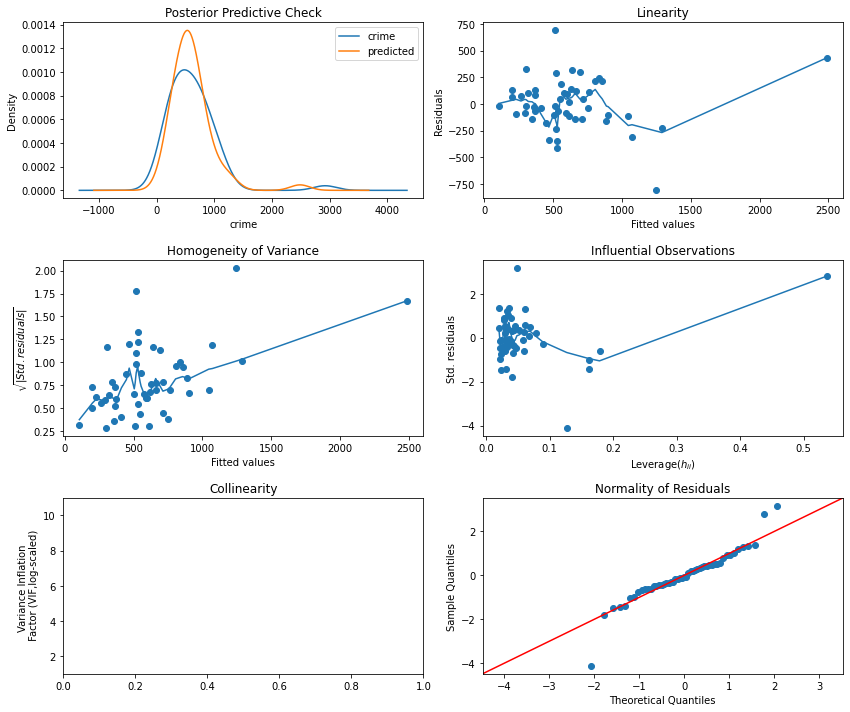

In [43]:
check_model(ols,figsize=(12,10))

### Accuracy score

In [44]:
accuracy_score(glm)

0.71

In [45]:
poisson.prsquared

0.21181123725288886

In [46]:
accuracy_score(mlogit)

0.61

In [47]:
accuracy_score(ologit)

0.5775

In [48]:
r2_tjur(glm)

0.10178650650542126

In [49]:
model_performance(ols,metrics="all")

{'AIC': 708.1879127342262,
 'AICC': 708.6985510320985,
 'BIC': 713.9833896323992,
 'r2 score': 0.7071892174239846,
 'r2 score adj.': 0.6949887681499839,
 'expl. var. score': 0.7071892174239844,
 'mean abs. error': 175.67026394888364,
 'median abs. error': 116.8029123342584,
 'mean sq. error': 236.33651246720214,
 'root mean sq. error': 55854.94712515999,
 'mean abs. percentage error': 0.43814555141628375}

In [50]:
model_performance(glm,metrics="all")

{'AIC': 470.51749247589896,
 'AICC': 470.7312329339142,
 'BIC': 494.4662797585469,
 'accuracy': 0.71,
 'r2 mcfadden': 0.08292194470084713,
 'r2 mcfadden adj.': 0.066921193229454,
 'r2 coxsnell': 0.09845702133885237,
 'r2 naglekerke': 0.13799580151192056,
 'r2 efron': 0.1014324863895315,
 'r2 mckelvey': 0.0066827308985470645,
 'r2 count': 0.71,
 'r2 count adj.': 0.08661417322834646,
 'r2 tjur': 0.10178650650542126}

In [51]:
model_performance(mlogit,metrics="all")

{'AIC': 375.9634524301854,
 'AICC': 368.16858063531356,
 'BIC': 402.34999136256965,
 'accuracy': 0.61,
 'r2 mcfadden': 0.11815453688722355,
 'r2 mcfadden adj.': 0.09365634249667465,
 'r2 coxsnell': 0.21427583263584715,
 'r2 naglekerke': 0.24626662225304194}

In [52]:
model_performance(ologit,metrics="all")

{'AIC': 727.0248715214162,
 'AICC': 727.1771557853756,
 'BIC': 746.9821942569562,
 'accuracy': 0.5775,
 'r2 mcfadden': 0.032623096025919285,
 'r2 mcfadden adj.': 0.027226480413847454,
 'r2 coxsnell': 0.058660132603080783,
 'r2 naglekerke': 0.06956550592890084}

In [53]:
check_heteroscedasticity(ols,test="bp")

{'lm': 7.629588692496902,
 'lm-pvalue': 0.02204224705835547,
 'fvalue': 4.222005812249412,
 'f-pvalue': 0.020462597128417494,
 'warning': 'According to Breusch-Pagan Test, Heteroscedasticity (non-constant variance) detected (p < 0.05).'}

In [54]:
check_heteroscedasticity(ols,test="white")

{'lm': 10.730094473935974,
 'lm-pvalue': 0.057001958416795194,
 'fvalue': 2.3980898143135674,
 'f-pvalue': 0.05192052644257611}

In [55]:
check_heteroscedasticity(ols,test ="gq")

{'fvalue': 0.4936187700179023,
 'f-pvalue': 0.9486277671889443,
 'alternative': 'increasing'}

## Autoccorrelation

## Linear Model

### Durbin Watson

In [56]:
check_autocorrelation(ols,test="dw")

2.0400073999204227

### Box - Pierce/ Ljung - Box

In [57]:
check_autocorrelation(ols,test='lb-bp',nlags=1)

,lb_stat,lb_pvalue,bp_stat,bp_pvalue
1,0.265987,0.606037,0.250931,0.616421


### Breusch - Godfrey

In [58]:
check_autocorrelation(ols,test="bg",nlags=2)

{'lm': 0.27164954056436386,
 'lm-pvalue': 0.8729955938582072,
 'fvalue': 0.1231646480990179,
 'f-pvalue': 0.884408651001559}

### Heteroskedasticity-and-Autocorrelation-Consistent Standard Errors (HAC)

In [59]:
check_autocorrelation(ols,test="nw",nlags=2)

{'cov. ':               Intercept     poverty       single
 Intercept  87885.346704 -619.791830 -7146.849168
 poverty     -619.791830  133.375479  -102.005918
 single     -7146.849168 -102.005918   768.379735,
 'coef. model HAC':                  Coef.    Std.Err.         t         P>|t|       [0.025  \
 Intercept -1368.188661  287.603234 -4.757209  1.833390e-05 -1946.453719   
 poverty       6.787359   11.204011  0.605797  5.475035e-01   -15.739815   
 single      166.372670   26.892023  6.186692  1.299475e-07   112.302633   
 
                0.975]  
 Intercept -789.923602  
 poverty     29.314533  
 single     220.442707  }

###  Feasible GLS - Cochrane-Orcutt Procedure (CORC)

In [60]:
check_autocorrelation(ols,test="corc")

{'coef. ':              Coef.    Std.Err.         t         P>|t|       [0.025  \
 const -1410.962464  185.269872 -7.615715  9.593622e-10 -1783.677370   
 x1        0.217284    9.163142  0.023713  9.811821e-01   -18.216580   
 x2      178.970072   20.212053  8.854621  1.394304e-11   138.308667   
 
             0.975]  
 const -1038.247558  
 x1       18.651148  
 x2      219.631477  ,
 'rho': -0.10485831497888663}

## Logistic Regression

### Durbin watson

In [61]:
check_autocorrelation(glm,test="dw")

1.9478844329870433

### Cochran - Orcutt

In [62]:
check_autocorrelation(glm,test="corc")

{'coef. ':           Coef.  Std.Err.         t     P>|t|    [0.025    0.975]
 const -0.266904  0.216260 -1.234179  0.217874 -0.692075  0.158268
 x1    -0.162668  0.067832 -2.398084  0.016947 -0.296027 -0.029308
 x2    -0.289009  0.070413 -4.104479  0.000049 -0.427442 -0.150575
 x3    -0.324580  0.079494 -4.083091  0.000054 -0.480866 -0.168294
 x4     0.000419  0.000212  1.976584  0.048787  0.000002  0.000836
 x5     0.159809  0.064172  2.490336  0.013174  0.033646  0.285971,
 'rho': 0.021508516957747754}

## Multinomial Logistic

### Cochrane - Orcutt

In [63]:
check_autocorrelation(mlogit,test="corc")

{'coef. ':           Coef.  Std.Err.         t         P>|t|    [0.025    0.975]
 const  2.459913  0.335258  7.337382  5.724919e-12  1.798716  3.121109
 x1     0.054838  0.135058  0.406037  6.851606e-01 -0.211523  0.321200
 x2    -0.252746  0.149437 -1.691316  9.237392e-02 -0.547466  0.041975
 x3    -0.032052  0.006123 -5.235047  4.247947e-07 -0.044127 -0.019977,
 'rho': 0.08751981890300449}

## Ordered Model

### Cochrane Orcut

In [64]:
check_autocorrelation(ologit,test="corc")

{'coef. ':        Coef.  Std.Err.          t         P>|t|    [0.025    0.975]
 x1  0.362206  0.089539   4.045240  6.285144e-05  0.186175  0.538237
 x2  0.023742  0.093237   0.254643  7.991309e-01 -0.159559  0.207043
 x3  0.162389  0.013234  12.270742  1.477587e-29  0.136371  0.188406,
 'rho': 0.068011291700019}

In [65]:
from plotnine.data import mtcars

mtcars.head()

,name,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
0,Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
1,Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
2,Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
3,Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
4,Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2


In [66]:
mtcars = mtcars.set_index("name")
mtcars.head()

,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
name,,,,,,,,,,,
Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2


#### Check overdispersion

In [67]:
check_overdispersion(poisson)

OverdispersionTestResult(dispersion_ratio=1.082365994792688, chisq_statistic=212.14373497936685, df_denom=196.0, pvalue=0.20398603376564964)

In [68]:
for i in dir(ols_infl):
    print(i)

__class__
__delattr__
__dict__
__dir__
__doc__
__eq__
__format__
__ge__
__getattribute__
__gt__
__hash__
__init__
__init_subclass__
__le__
__lt__
__module__
__ne__
__new__
__reduce__
__reduce_ex__
__repr__
__setattr__
__sizeof__
__str__
__subclasshook__
__weakref__
_get_drop_vari
_ols_xnoti
_plot_index
_res_looo
aux_regression_endog
aux_regression_exog
cooks_distance
cov_ratio
det_cov_params_not_obsi
dfbeta
dfbetas
dffits
dffits_internal
endog
ess_press
exog
get_resid_studentized_external
hat_diag_factor
hat_matrix_diag
influence
k_vars
model_class
nobs
params_not_obsi
plot_index
plot_influence
resid
resid_press
resid_std
resid_studentized
resid_studentized_external
resid_studentized_internal
resid_var
results
scale
sigma2_not_obsi
summary_frame
summary_table


In [69]:
rstudent(ols)

0    -1.411802
1     0.483287
2     0.191569
3    -0.141537
4     1.015537
5    -0.610436
6     0.359735
7     0.367211
8     3.163279
9    -0.681086
10    0.255242
11    0.529306
12   -0.079702
13    1.349593
14   -0.092263
15    0.529979
16   -0.301645
17   -1.022305
18    1.204146
19    1.296173
20   -1.442724
21   -0.443665
22   -0.126359
23    0.785608
24   -4.110975
25   -1.478837
26    0.422265
27   -0.097768
28    0.304479
29   -0.381330
30    1.366322
31   -0.483222
32    0.479739
33    0.905904
34   -0.463965
35    0.089948
36   -0.366781
37    0.411649
38   -0.423947
39    0.910502
40   -0.349598
41    0.579527
42    0.201692
43   -0.277625
44   -0.162876
45   -1.781421
46   -0.602217
47   -0.759474
48   -0.622729
49   -0.965582
50    2.796107
dtype: float64

In [70]:
rstudent(glm)

0     -0.618946
1      1.576468
2      0.784628
3      1.877893
4     -0.504313
         ...   
395   -1.164222
396   -0.603408
397   -0.635002
398   -1.119830
399   -0.848949
Length: 400, dtype: float64

In [71]:
glm.df_resid

394.0

In [72]:
glm.nobs

400

In [73]:
r2_coxsnell(glm)

0.09845702133885237

In [74]:
#resid = glm.resid_dev
hii = glm_infl
hii

In [75]:
for i in dir(glm_infl):
    print(i)

__class__
__delattr__
__dict__
__dir__
__doc__
__eq__
__format__
__ge__
__getattribute__
__gt__
__hash__
__init__
__init_subclass__
__le__
__lt__
__module__
__ne__
__new__
__reduce__
__reduce_ex__
__repr__
__setattr__
__sizeof__
__str__
__subclasshook__
__weakref__
_diff_fittedvalues_one
_fittedvalues_one
_get_prediction
_plot_index
_res_looo
cooks_distance
cov_params
d_fittedvalues
d_fittedvalues_scaled
d_linpred
d_linpred_scaled
d_params
dfbetas
endog
exog
hat_matrix_diag
hat_matrix_exog_diag
hessian
k_params
k_vars
model_class
nobs
params_one
plot_index
plot_influence
resid
resid_score
resid_score_factor
resid_studentized
results
scale
score_obs
summary_frame


In [76]:
rstudent(glm)

0     -0.618946
1      1.576468
2      0.784628
3      1.877893
4     -0.504313
         ...   
395   -1.164222
396   -0.603408
397   -0.635002
398   -1.119830
399   -0.848949
Length: 400, dtype: float64

In [77]:
for i in dir(mlogit):
    print(i)

J
K
__class__
__delattr__
__dict__
__dir__
__doc__
__eq__
__format__
__ge__
__getattribute__
__getstate__
__gt__
__hash__
__init__
__init_subclass__
__le__
__lt__
__module__
__ne__
__new__
__reduce__
__reduce_ex__
__repr__
__setattr__
__sizeof__
__str__
__subclasshook__
__weakref__
_cache
_data_attr
_data_in_cache
_get_endog_name
_get_robustcov_results
_get_wald_nonlinear
_maybe_convert_ynames_int
_transform_predict_exog
_use_t
aic
bic
bse
conf_int
converged
cov_kwds
cov_params
cov_type
df_model
df_resid
f_test
fittedvalues
get_distribution
get_influence
get_margeff
get_prediction
im_ratio
info_criteria
initialize
k_constant
llf
llnull
llr
llr_pvalue
load
margeff
method
mle_retvals
mle_settings
model
nobs
normalized_cov_params
params
pred_table
predict
prsquared
pvalues
remove_data
resid_misclassified
resid_pearson
resid_response
save
scale
score_test
set_null_options
summary
summary2
t_test
t_test_pairwise
tvalues
use_t
wald_test
wald_test_terms


In [78]:
mlogit.resid_misclassified

0      0.0
1      1.0
2      1.0
3      0.0
4      0.0
      ... 
195    0.0
196    1.0
197    0.0
198    0.0
199    0.0
Length: 200, dtype: float64